<a href="https://colab.research.google.com/github/shreshtha77/CVIP-Data-Science/blob/main/Phase2/Email_Spam_Detection_CodersCave.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Email Spam Detection

Project while working as Data science intern at CodersCave


## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
from matplotlib.colors import ListedColormap
import nltk
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from collections import Counter

In [2]:
import warnings
warnings.filterwarnings('ignore')

#Loading the data

In [3]:
df= pd.read_csv('/content/spam.csv.csv', encoding='latin-1')
print(df)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        NaN  
1           NaN        NaN  


## Understanding and Pre-processing the data

In [4]:
df.head()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,ham,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN
1,ham,Ok lar... Joking wif u oni...,NaN,NaN,NaN
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN
3,ham,U dun say so early hor... U c already then say...,NaN,NaN,NaN
4,ham,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN


In [5]:
df.tail()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
5567,spam,This is the 2nd time we have tried 2 contact u...,NaN,NaN,NaN
5568,ham,Will Ì_ b going to esplanade fr home?,NaN,NaN,NaN
5569,ham,"Pity, * was in mood for that. So...any other s...",NaN,NaN,NaN
5570,ham,The guy did some bitching but I acted like i'd...,NaN,NaN,NaN
5571,ham,Rofl. Its true to its name,NaN,NaN,NaN


In [6]:
df.shape

(5572, 5)

In [7]:
df.describe

<bound method NDFrame.describe of         v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...        NaN   
1      ham                      Ok lar... Joking wif u oni...        NaN   
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3      ham  U dun say so early hor... U c already then say...        NaN   
4      ham  Nah I don't think he goes to usf, he lives aro...        NaN   
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...        NaN   
5568   ham              Will Ì_ b going to esplanade fr home?        NaN   
5569   ham  Pity, * was in mood for that. So...any other s...        NaN   
5570   ham  The guy did some bitching but I acted like i'd...        NaN   
5571   ham                         Rofl. Its true to its name        NaN   

     Unnamed: 3 Unnamed: 4  
0           NaN        N

In [8]:
df.describe()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [10]:
df.isnull()

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
0,False,False,True,True,True
1,False,False,True,True,True
2,False,False,True,True,True
3,False,False,True,True,True
4,False,False,True,True,True
...,...,...,...,...,...
5567,False,False,True,True,True
5568,False,False,True,True,True
5569,False,False,True,True,True
5570,False,False,True,True,True


In [11]:
df.isnull().sum()

v1               0
v2               0
Unnamed: 2    5522
Unnamed: 3    5560
Unnamed: 4    5566
dtype: int64

In [12]:
df['v1'].value_counts()

ham     4825
spam     747
Name: v1, dtype: int64

In [13]:
df = df.where((pd.notnull(df)), "")
print(df)

        v1                                                 v2 Unnamed: 2  \
0      ham  Go until jurong point, crazy.. Available only ...              
1      ham                      Ok lar... Joking wif u oni...              
2     spam  Free entry in 2 a wkly comp to win FA Cup fina...              
3      ham  U dun say so early hor... U c already then say...              
4      ham  Nah I don't think he goes to usf, he lives aro...              
...    ...                                                ...        ...   
5567  spam  This is the 2nd time we have tried 2 contact u...              
5568   ham              Will Ì_ b going to esplanade fr home?              
5569   ham  Pity, * was in mood for that. So...any other s...              
5570   ham  The guy did some bitching but I acted like i'd...              
5571   ham                         Rofl. Its true to its name              

     Unnamed: 3 Unnamed: 4  
0                           
1                           


In [14]:
df.isnull().sum()

v1            0
v2            0
Unnamed: 2    0
Unnamed: 3    0
Unnamed: 4    0
dtype: int64

In [15]:
df.drop(['Unnamed: 2','Unnamed: 3', 'Unnamed: 4'], axis = 1, inplace = True)

In [16]:
df.head()

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [17]:
df.shape

(5572, 2)

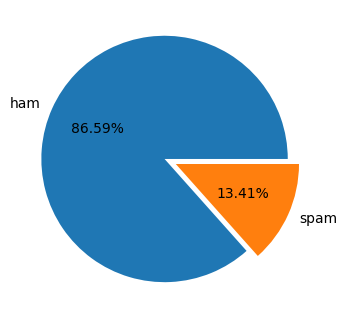

In [18]:
plt.figure(figsize=(4, 4))
plt.pie(df['v1'].value_counts(), labels=['ham', 'spam'], autopct='%0.2f%%', explode=[0.1, 0])
plt.show()

In [19]:
df['Msg Length'] = df['v1'].apply(len)

In [20]:
df.head()

,v1,v2,Msg Length
0,ham,"Go until jurong point, crazy.. Available only ...",3
1,ham,Ok lar... Joking wif u oni...,3
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...,4
3,ham,U dun say so early hor... U c already then say...,3
4,ham,"Nah I don't think he goes to usf, he lives aro...",3


## Histogram

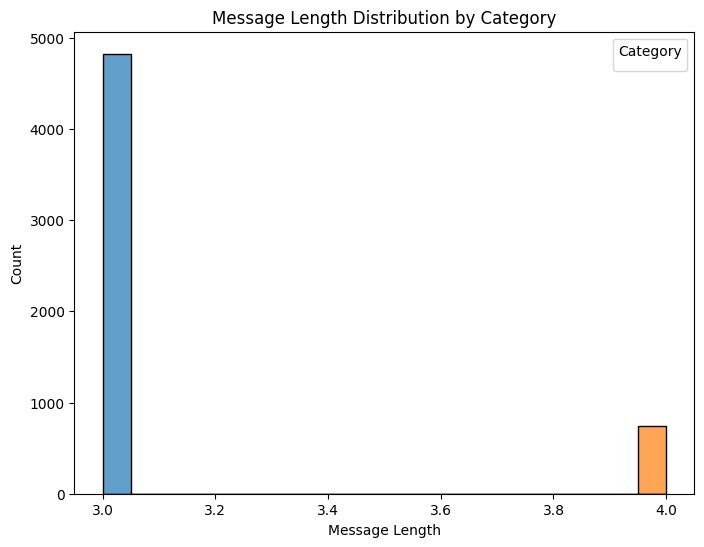

In [22]:
plt.figure(figsize=(8, 6))
sns.histplot(data=df, x='Msg Length', hue='v1', bins=20, alpha=0.7)
plt.title('Message Length Distribution by Category')
plt.xlabel('Message Length')
plt.ylabel('Count')
plt.legend(title='Category')
plt.show()

## Most common words

In [23]:
from collections import Counter
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [24]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/abc.zip.
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Unzipping corpora/alpino.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping
[nltk_data]    |       taggers/averaged_perceptron_tagger_ru.zip.
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Unzipping grammars/basque_grammars.zip.
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    | Downloading package biocreative_ppi to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   U

True

In [25]:
stop_words = set(stopwords.words('english'))

In [26]:
all_words = [word.lower() for message in df['v2'] for word in word_tokenize(message) if word.isalpha() and word.lower() not in stop_words]
word_counts = Counter(all_words)
top_words = word_counts.most_common(10)

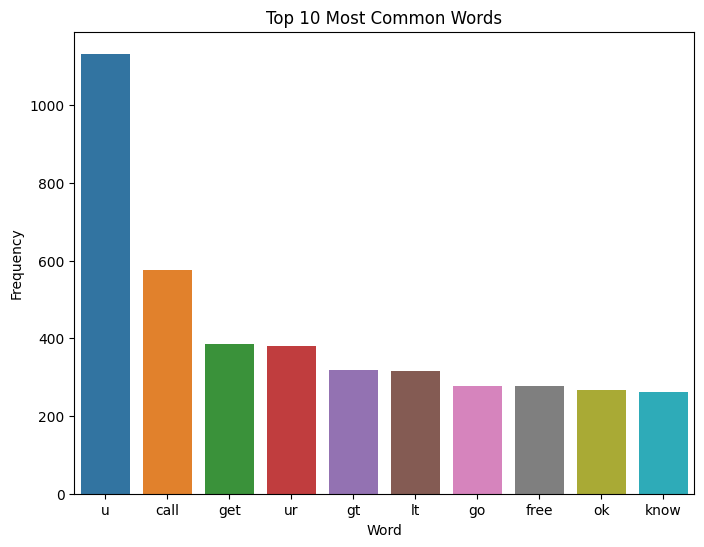

In [27]:
plt.figure(figsize=(8, 6))
sns.barplot(x=[word[0] for word in top_words], y=[word[1] for word in top_words])
plt.title('Top 10 Most Common Words')
plt.xlabel('Word')
plt.ylabel('Frequency')
plt.show()

## Spam messages

In [30]:
spam_messages = ' '.join(df[df['v1'] == 'spam']['v2'])
words = spam_messages.split()
word_counts = Counter(words)

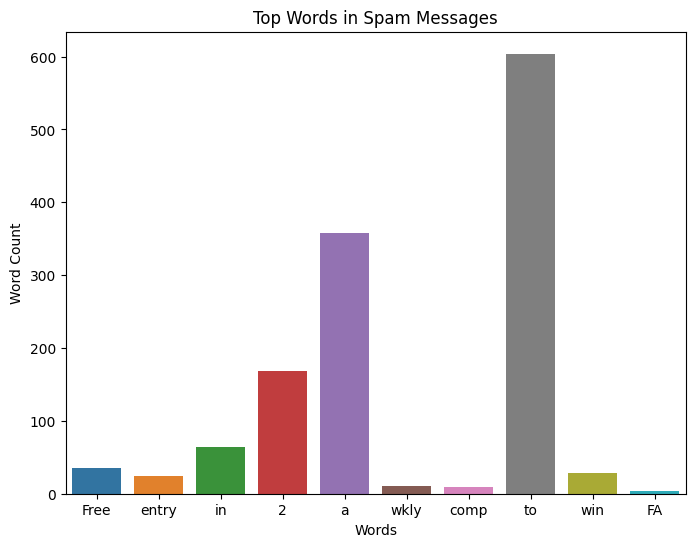

In [31]:
plt.figure(figsize=(8, 6))
sns.barplot(x=list(word_counts.keys())[:10], y=list(word_counts.values())[:10])
plt.title('Top Words in Spam Messages')
plt.xlabel('Words')
plt.ylabel('Word Count')
plt.show()

## Analysing the sentiment

In [32]:
from textblob import TextBlob

df['Sentiment'] = df['v2'].apply(lambda x: TextBlob(x).sentiment.polarity)

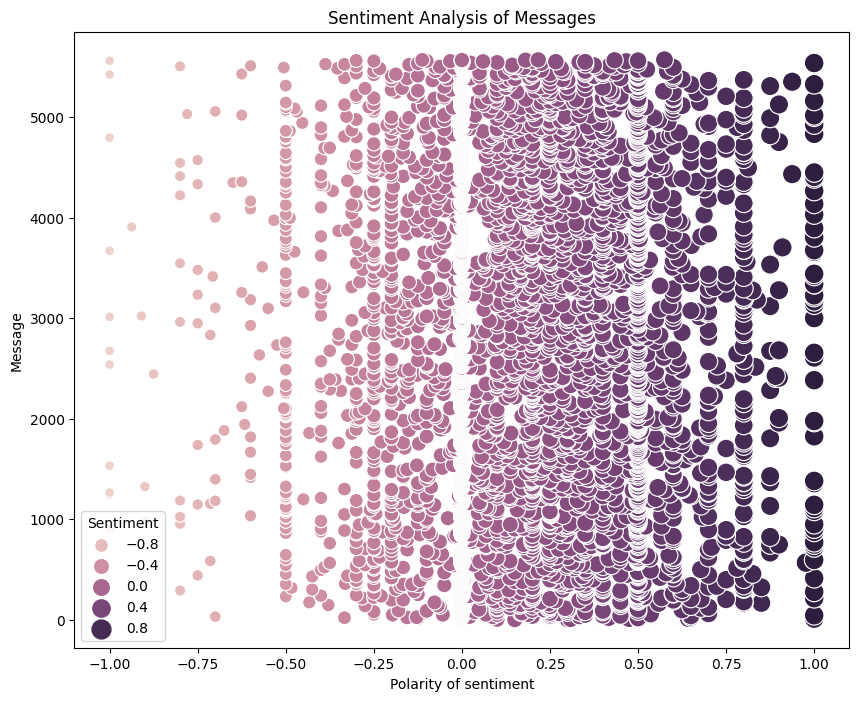

In [33]:
plt.figure(figsize=(10, 8))
sns.scatterplot(data=df, x='Sentiment', y=df.index, hue='Sentiment', size='Sentiment', sizes=(50, 200))
plt.title('Sentiment Analysis of Messages')
plt.xlabel('Polarity of sentiment')
plt.ylabel('Message')
plt.legend(title='Sentiment')
plt.show()

## Results

In [35]:
df['Contains_Urgent'] = df['v2'].apply(lambda x: 'urgent' in x.lower())

In [36]:
df['Is_Question'] = df['v2'].apply(lambda x: x.endswith('?'))

In [37]:
df['Is_Meeting'] = df['v2'].apply(lambda x: 'meeting' in x.lower())

In [38]:
df['Analysis_Type'] = 'None'
df.loc[df['Contains_Urgent'], 'Analysis_Type'] = 'Keyword: Urgent'
df.loc[df['Is_Question'], 'Analysis_Type'] = 'Question'
df.loc[df['Is_Meeting'], 'Analysis_Type'] = 'Meeting'

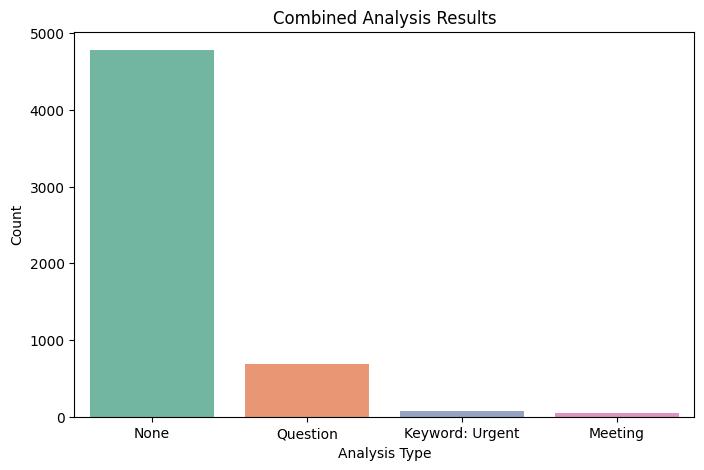

In [39]:
analysis_counts = df['Analysis_Type'].value_counts()
plt.figure(figsize=(8, 5))
sns.barplot(x=analysis_counts.index, y=analysis_counts.values, palette='Set2')
plt.title('Combined Analysis Results')
plt.xlabel('Analysis Type')
plt.ylabel('Count')
plt.show()